<a href="https://colab.research.google.com/github/konstantinosPapado/Convolutional-Neural-Network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 8. Artificial Neural Networks

For this exercise will use the dog breed image dataset from kaggle: https://www.kaggle.com/datasets/khushikhushikhushi/dog-breed-image-dataset

In [21]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization

In [2]:
!unzip dog_image.zip

Archive:  dog_image.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflati

In [3]:
images = []
labels = []

In [4]:
for root, dir, files in os.walk("."):
  for file in files:
    if file.endswith(".jpg"):
      label = os.path.basename(os.path.dirname(os.path.join(root, file)))
      img = cv2.imread(os.path.join(root, file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #Resize image to 64*64
      img = cv2.resize(img, (64,64))
      images.append(img)
      labels.append(label)


Create X and y.

In [5]:
X = np.array(images)
y = np.array(labels)

Normalize X

In [6]:
X=X/255.0

In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [8]:
print(X.shape)
print(y_onehot.shape)

(967, 64, 64, 3)
(967, 10)


We will build a Neural Network, which takes as input the flatten image, has 3 hidden layers with relu activation and results in 10 outputs(one for each breed)

In [9]:
mlp =  Sequential([
    Flatten(input_shape=(64,64,3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross entropy is used as the metric to calculate the loss, from the output of the model to the actual target.
Optimizer Adam: is the algorithm that updates the weights based on the error in order to minimize it.

In [10]:
mlp.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y_onehot, test_size=0.2, random_state=42)

Epochs: With epoch 30, the Neural Network will be trained in 30 loops, so it will be given each image 30 times.
Batch size: Indicates the number of images the models sees before it updates its weights.

In [13]:
nn=mlp.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.1060 - loss: 3.5641 - val_accuracy: 0.2010 - val_loss: 2.3588
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2551 - loss: 2.1770 - val_accuracy: 0.3608 - val_loss: 1.9447
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3066 - loss: 2.0069 - val_accuracy: 0.2216 - val_loss: 2.2358
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3336 - loss: 1.8798 - val_accuracy: 0.2371 - val_loss: 1.9966
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4232 - loss: 1.6171 - val_accuracy: 0.4536 - val_loss: 1.6472
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5591 - loss: 1.3442 - val_accuracy: 0.5052 - val_loss: 1.5091
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5487 - loss: 1.3508 - val_accuracy: 0.4639 - val_loss: 1.4428
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6637 - loss: 1.0846 - val_accuracy: 0.5979 - val_los

Below, we will plot the acc, val_acc, loss and val_loss of our model.

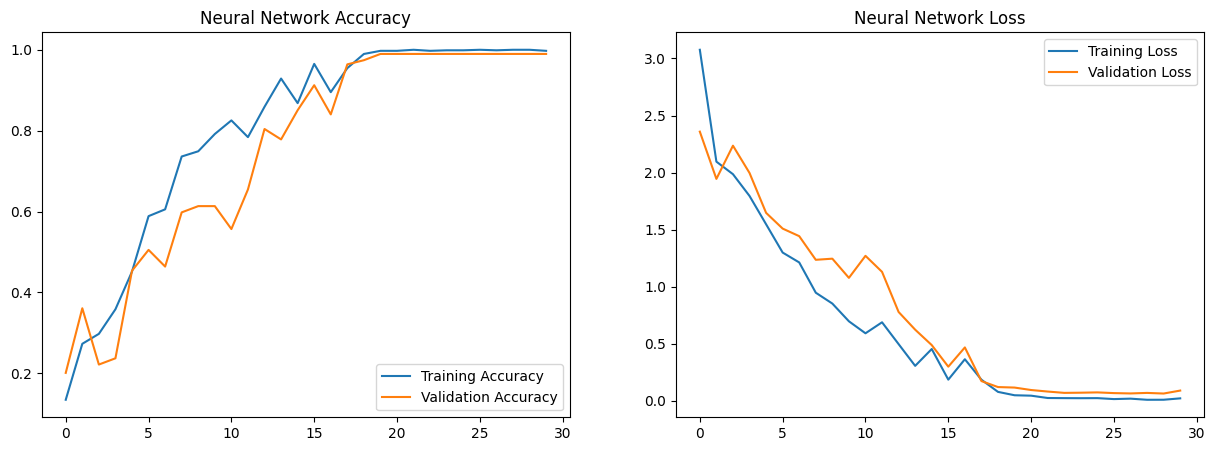

In [15]:
acc = nn.history['accuracy']
val_acc = nn.history['val_accuracy']
loss = nn.history['loss']
val_loss = nn.history['val_loss']
epoch_range = range(len(acc))
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.title(f'{'Neural Network'} Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title(f'{'Neural Network'} Loss')
plt.legend(loc='upper right')

plt.show()

Now, we will create a CNN (Convolutional Neural Network) to compare it with our MLP.

In [17]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [19]:
final_cnn = cnn.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.1151 - loss: 2.3214 - val_accuracy: 0.2216 - val_loss: 2.2671
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1985 - loss: 2.2184 - val_accuracy: 0.3247 - val_loss: 1.9540
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2911 - loss: 1.9161 - val_accuracy: 0.3711 - val_loss: 1.6357
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4743 - loss: 1.4965 - val_accuracy: 0.6546 - val_loss: 1.1277
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6710 - loss: 1.0423 - val_accuracy: 0.8144 - val_loss: 0.6850
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7435 - loss: 0.6949 - val_accuracy: 0.8505 - val_loss: 0.4515
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8352 - loss: 0.5193 - val_accuracy: 0.9639 - val_loss: 0.2902
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9065 - loss: 0.3019 - val_accuracy: 0.9691 - 

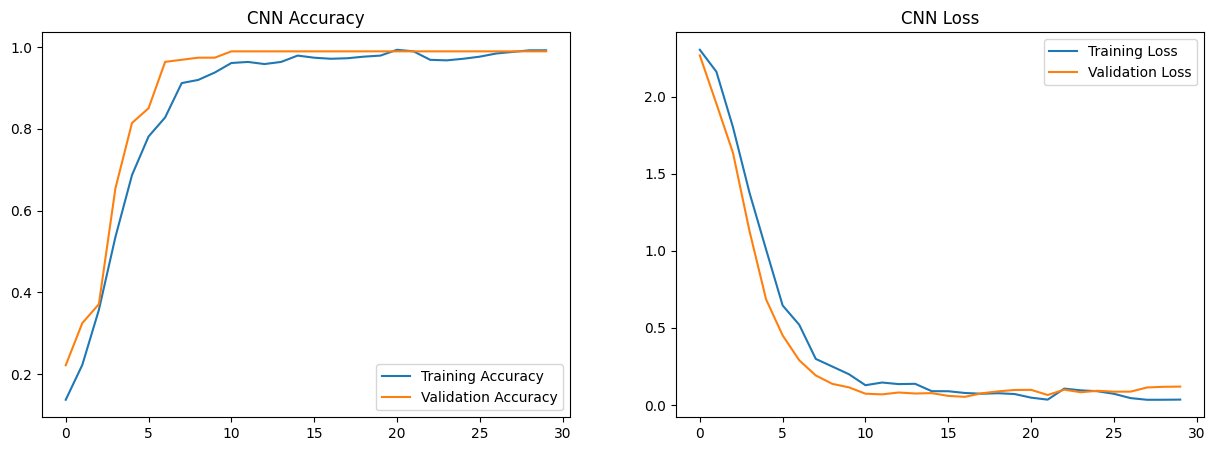

In [20]:
acc = final_cnn.history['accuracy']
val_acc = final_cnn.history['val_accuracy']
loss = final_cnn.history['loss']
val_loss = final_cnn.history['val_loss']
epoch_range = range(len(acc))
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.title(f'{'CNN'} Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title(f'{'CNN'} Loss')
plt.legend(loc='upper right')

plt.show()

CNN vs MLP
Generally, CNN is better for images than MLP, as it does not requiere flatten() to the data, because they are given to the model in the form of grid, so local relationships between the pixels are kept intact, as oposed to the MLP which does not happen through to flattening the input.
CNN als has Hierarchical Feature Learning, meaning first layers learns simple relationships, and the later ones learn more complex ones.
MLP is also more prone to overfitting, since every neuron is connected with all the pixels.

Now, we will try to improve our CNN through BatchNorm.

In [22]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [24]:
final_cnn = cnn.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 317ms/step - accuracy: 0.2619 - loss: 3.2677 - val_accuracy: 0.1082 - val_loss: 2.8030
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6419 - loss: 1.0480 - val_accuracy: 0.1753 - val_loss: 6.5942
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7882 - loss: 0.5786 - val_accuracy: 0.1392 - val_loss: 9.1735
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8666 - loss: 0.3654 - val_accuracy: 0.0979 - val_loss: 10.1149
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8708 - loss: 0.3382 - val_accuracy: 0.0979 - val_loss: 10.8443
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9086 - loss: 0.2443 - val_accuracy: 0.1237 - val_loss: 9.7991
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9144 - loss: 0.2251 - val_accuracy: 0.1598 - val_loss: 9.7225
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9513 - loss: 0.1591 - val_accuracy: 0.1804

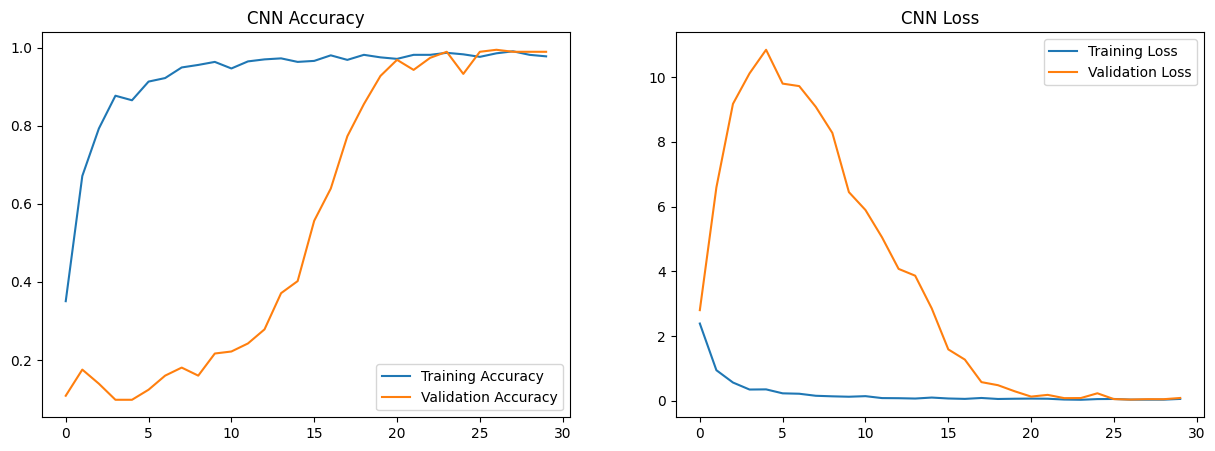

In [25]:
acc = final_cnn.history['accuracy']
val_acc = final_cnn.history['val_accuracy']
loss = final_cnn.history['loss']
val_loss = final_cnn.history['val_loss']
epoch_range = range(len(acc))
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.title(f'{'CNN'} Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title(f'{'CNN'} Loss')
plt.legend(loc='upper right')

plt.show()